In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("../../datasets/ads/Advertising.csv")

## Divided the data in training and test

In [4]:
a = np.random.randn(len(data))

(array([ 2.,  9., 16., 32., 31., 56., 34., 12.,  6.,  2.]),
 array([-3.08411167, -2.48506098, -1.88601029, -1.2869596 , -0.68790892,
        -0.08885823,  0.51019246,  1.10924315,  1.70829384,  2.30734453,
         2.90639521]),
 <a list of 10 Patch objects>)

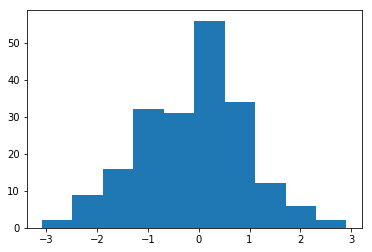

In [5]:
plt.hist(a)

In [8]:
check = (a<0.8)
training = data[a<0.8]
test = data[~check]

In [9]:
len(training),len(test)

(165, 35)

In [10]:
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     628.9
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           4.36e-77
Time:                        22:15:50   Log-Likelihood:                -325.23
No. Observations:                 165   AIC:                             656.5
Df Residuals:                     162   BIC:                             665.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8543      0.343      8.327      0.000       2.177       3.531
TV             0.0452      0.002     29.032      0.000       0.042       0.048
Radio          0.1898      0.009     20.104      0.000       0.171       0.208
==============================================================================
Omnibus:                       50.743   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.565
Skew:                          -1.327   Prob(JB):                     1.79e-26
Kurtosis:                       6.194   Cond. No.                         434.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model:   Sales = 2.8543 + 0.0452 * TV + 0.1898 * Radio

## Validte the model

In [13]:
sales_predict = lm.predict(test)

In [15]:
SSD = sum((test["Sales"]-sales_predict)**2)
SSD

61.84675509519158

In [16]:
RSE = np.sqrt(SSD/(len(test)-3))

In [17]:
RSE

1.3902198015870502

In [18]:
sales_mean = np.mean(test["Sales"])
error = RSE/sales_mean
error

0.09475694850155163